In [35]:
import pandas as pd
import os
import numpy as np
from utils import Processing as PR, text_preprocessing as TP
import multiprocessing

import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

pd.set_option('max_columns', None)
pd.set_option('display.max_rows', 100)
from collections import Counter

[nltk_data] Downloading package stopwords to /home/mourad/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
%%time
# df = PR.format_csvs_to_df('../data/Copy of dev_south_america_merged/')
df = pd.read_csv('../data/formated.csv')
print(df.shape)

/home/mourad/anaconda3/lib/python3.8/site-packages/IPython/core/magics/execution.py:1321: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code, glob, local_ns)


(10815072, 38)
CPU times: user 1min 19s, sys: 13.7 s, total: 1min 33s
Wall time: 1min 33s


In [3]:
# %%time
# df['created_at'] = pd.to_datetime(df['created_at'])
# df['lat'], df['long'] = df.coordinates.apply(lambda x : x[0]), df.coordinates.apply(lambda x : x[1])
# df['id'] = df['id'].astype(np.int64).astype(str)
# df['conversation_id'] = df['conversation_id'].fillna(0).astype(np.int64).astype(str)
# df['in_reply_to_user_id'] = df['in_reply_to_user_id'].fillna(0).astype(np.int64).astype(str)
# df['author_id'] = df['author_id'].fillna(0).astype(np.int64).astype(str)
# # df['geo_country'] = df['geo_country'].apply(lambda x : PR.rename_coutries(x)) 

In [4]:
# df.to_csv('../data/formated.csv')

In [5]:
df.sort_values('id').head()

,Unnamed: 0,lang,id,created_at,text,conversation_id,in_reply_to_user_id,reply_settings,source,possibly_sensitive,geo_place_id,geo_place_type,geo_country,geo_full_name,geo_country_code,geo_geo_type,geo_geo_bbox,geo_geo_properties,author_id,author_profile_image_url,author_username,author_url,author_name,author_created_at,author_verified,author_protected,author_description,retweet_count,reply_count,like_count,quote_count,followers_count,following_count,tweet_count,listed_count,coordinates,lat,long
5714870,2821,es,1356210702650904576,2021-02-01 12:00:03+00:00,Acaba de publicar una foto en Urbanización San...,1356210702650904576,0,everyone,Instagram,True,0176ea0c39765f09,city,Venezuela,"San Francisco, Venezuela",VE,NaN,"[-71.6788483, 10.5293207, -71.6111978, 10.5961...",{},2471875070,https://pbs.twimg.com/profile_images/127973853...,renelop97965381,NaN,INMOBILIARIA ASESOR ESOR René Lopez K.L MARCAIBO,2014-05-01T03:37:13.000Z,False,False,NaN,0.0,0.0,0.0,0.0,3,3,740,0,"[10.260839184739002, -71.97499804311941]",10.260839,-71.974998
5714869,2820,es,1356210748637241344,2021-02-01 12:00:14+00:00,El lunes ya me empezó mal 🥳.,1356210748637241344,0,everyone,Twitter for iPhone,False,002e2add0d1ff144,city,Venezuela,"Ciudad Ojeda, Venezuela",VE,NaN,"[-71.3538208, 10.1781855, -71.2887573, 10.2315...",{},116914586,https://pbs.twimg.com/profile_images/134374322...,Saidyaraujo,https://t.co/dShomYDPG4,Saidy,2010-02-23T23:56:07.000Z,False,False,Post Nubila Phoebus. 🌤,0.0,1.0,0.0,0.0,796,423,38182,6,"[10.260839184739002, -71.97499804311941]",10.260839,-71.974998
8487107,4671,es,1356210789477191680,2021-02-01 12:00:24+00:00,@AndresCjn41 @Maridon13335354 Las cajitas Erót...,1353150416972881920,3057698002,everyone,Twitter for Android,False,0170d9df339a9451,city,Colombia,"Riohacha, Colombia",CO,NaN,"[-73.3878010031889, 10.907056003372, -72.60212...",{},1351759796983181312,https://pbs.twimg.com/profile_images/135176020...,puntog_tienda,https://t.co/na293qCNhD,PuntoGTienda,2021-01-20T05:14:27.000Z,False,False,Somos los cómplices perfectos del Placer ❤️ En...,0.0,0.0,0.0,0.0,37,24,22,0,"[11.343964420474848, -72.29185226444467]",11.343964,-72.291852
5799186,3482,es,1356210882355802112,2021-02-01 12:00:46+00:00,"Pues crealooo,porque no me leí nada de eso pro...",1356210882355802112,0,everyone,Twitter for iPhone,False,01030be40ff4ff39,city,Colombia,"Sahagún, Colombia",CO,NaN,"[-75.5609759988304, 8.56956300178352, -75.2774...",{},1115724327435956224,https://pbs.twimg.com/profile_images/142053884...,ChechooSerpa,NaN,Chechoo_Serpa🌞.,2019-04-09T21:13:03.000Z,False,False,Estudiante de Derecho 👨‍🎓 ⚖️,0.0,0.0,3.0,0.0,63,262,2024,0,"[8.633174749054467, -75.40033266090484]",8.633175,-75.400333
6236907,3369,es,1356210882355802112,2021-02-01 12:00:46+00:00,"Pues crealooo,porque no me leí nada de eso pro...",1356210882355802112,0,everyone,Twitter for iPhone,False,01030be40ff4ff39,city,Colombia,"Sahagún, Colombia",CO,NaN,"[-75.5609759988304, 8.56956300178352, -75.2774...",{},1115724327435956224,https://pbs.twimg.com/profile_images/142053884...,ChechooSerpa,NaN,Chechoo_Serpa🌞.,2019-04-09T21:13:03.000Z,False,False,Estudiante de Derecho 👨‍🎓 ⚖️,0.0,0.0,3.0,0.0,63,262,2024,0,"[8.633958647805697, -74.30371468927508]",8.633959,-74.303715


### Duplicates

In [6]:
%%time 
df_dupli_sort = df[df.duplicated('id')].sort_values('id')

CPU times: user 4.26 s, sys: 573 ms, total: 4.84 s
Wall time: 4.83 s


In [7]:
df_dupli_sort[['id', 'created_at', 'text','geo_geo_bbox', 'coordinates']].head(10)

,id,created_at,text,geo_geo_bbox,coordinates
6236907,1356210882355802112,2021-02-01 12:00:46+00:00,"Pues crealooo,porque no me leí nada de eso pro...","[-75.5609759988304, 8.56956300178352, -75.2774...","[8.633958647805697, -74.30371468927508]"
9093827,1356210882355802112,2021-02-01 12:00:46+00:00,"Pues crealooo,porque no me leí nada de eso pro...","[-75.5609759988304, 8.56956300178352, -75.2774...","[8.633566689402377, -74.8520239579793]"
10461627,1356210903507750912,2021-02-01 12:00:51+00:00,Todos esos barberos intensos me dan como ladil...,"[-71.1957474, 8.5660877, -71.1269677, 8.631216]","[8.6363107774379, -71.01384719274392]"
1654141,1356210903507750912,2021-02-01 12:00:51+00:00,Todos esos barberos intensos me dan como ladil...,"[-71.1957474, 8.5660877, -71.1269677, 8.631216]","[8.636702862253415, -70.46553396211206]"
10788121,1356211124618854400,2021-02-01 12:01:43+00:00,✍🏽 https://t.co/NwUGvXVEiz,"[-73.7195089983023, 9.04708100067454, -73.2805...","[9.176336590342029, -73.33889193777357]"
6222981,1356211246652149760,2021-02-01 12:02:13+00:00,Rusia prevé normas adicionales para los gigant...,"[-64.6778108, 10.0977755, -64.5428047, 10.2360...","[10.267850269190935, -63.71156430755125]"
5560157,1356211246652149760,2021-02-01 12:02:13+00:00,Rusia prevé normas adicionales para los gigant...,"[-64.6778108, 10.0977755, -64.5428047, 10.2360...","[10.268317848673872, -63.16066225516849]"
1198018,1356211458372235264,2021-02-01 12:03:03+00:00,@juliovreiker1 @mhcamargo @frankdurangoes @jor...,"[-75.7061430026356, 2.71225299542781, -74.9383...","[3.2170298179049994, -74.51017496996857]"
5560156,1356211545240444928,2021-02-01 12:03:24+00:00,Una exreina de belleza no puede conseguir trab...,"[-64.6778108, 10.0977755, -64.5428047, 10.2360...","[10.268317848673872, -63.16066225516849]"
6222980,1356211545240444928,2021-02-01 12:03:24+00:00,Una exreina de belleza no puede conseguir trab...,"[-64.6778108, 10.0977755, -64.5428047, 10.2360...","[10.267850269190935, -63.71156430755125]"


### Date

In [8]:
%%time
(min(df.created_at), max(df.created_at))

TypeError: '<' not supported between instances of 'float' and 'str'

### Lattitude / Longitude

In [9]:
print('latitude:', min(df.lat), max(df.lat))
print('longitude:',min(df.long), max(df.long))

latitude: -54.69321231192183 12.429793434161136
longitude: -91.17963727111682 -32.18832508121774


### Categorical values count

In [10]:
df.lang.value_counts()

es     4653349
pt     4325646
und    1181968
en      280886
it       49969
in       37262
tl       29851
fr       26944
ca       23071
eu       12089
ht       10947
et       10188
tr        8065
de        6924
nl        5884
lt        5772
ro        4410
hu        3935
cs        3547
pl        3508
fi        3384
cy        3376
is        2615
lv        2546
no        2313
sv        2121
ja        2031
da        1767
hi        1585
sl        1180
vi        1068
ko         973
ru         780
zh         485
ar         469
iw         248
fa          26
el          23
bn          13
uk          13
bg          12
th          11
kn          10
am           7
ps           6
te           6
km           5
ta           3
ml           2
my           2
ne           2
mr           1
ur           1
lo           1
Name: lang, dtype: int64

In [11]:
df.reply_settings.value_counts()

everyone          10683208
following            22164
mentionedUsers        5882
other                   46
Name: reply_settings, dtype: int64

In [12]:
df.source.value_counts()

Twitter for Android    7602289
Twitter for iPhone     2641375
Instagram               407269
Central132               20990
Twitter for iPad          7734
                        ...   
OS X                         1
Postmypost                   1
patrimonial.site             1
Twitter for  iPhone          1
SoundHound                   1
Name: source, Length: 114, dtype: int64

In [13]:
df.possibly_sensitive.value_counts()

False    10601243
True       110057
Name: possibly_sensitive, dtype: int64

<AxesSubplot:>

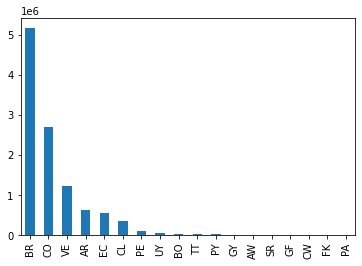

In [14]:
df.geo_country_code.value_counts().plot.bar()

In [15]:
df.geo_country.value_counts()

Colombia                       2687600
Brésil                         2317893
Brazil                         2075335
Venezuela                      1220375
Brasile                         721656
Ecuador                         546745
Argentina                       451201
Chile                           202576
Argentine                       175314
Chili                           141638
Peru                             93818
Brasilien                        51102
Uruguay                          46415
Trinidad and Tobago              22805
Paraguay                         15708
Bolivie                          13291
Bolivia                          10254
Guyana                            9274
Aruba                             4319
Suriname                          3932
Fransk Guyana                     2080
Curaçao                            634
Falkland Islands (Malvinas)        193
Panama                              35
French Guiana                       20
Name: geo_country, dtype:

In [16]:
df.geo_full_name.value_counts()

Bogotá, D.C., Colombia                                    930721
Rio de Janeiro, Brésil                                    437731
São Paulo, Brésil                                         400179
Guayaquil, Ecuador                                        380278
Medellín, Colombia                                        310253
                                                           ...  
Cia. Paulista de Estradas de Ferro (Museu Ferroviário)         1
Jardim do Lago II, Campinas                                    1
Doce Essência                                                  1
Taquaral, Campinas                                             1
Parque Croacia                                                 1
Name: geo_full_name, Length: 27735, dtype: int64

In [17]:
df.geo_geo_properties.value_counts()

{}    10814353
Name: geo_geo_properties, dtype: int64

In [18]:
df.author_verified.value_counts()

False    10749873
True        65199
Name: author_verified, dtype: int64

In [19]:
df.author_protected.value_counts()

False    10815072
Name: author_protected, dtype: int64

In [20]:
df.author_protected.value_counts()

False    10815072
Name: author_protected, dtype: int64

### NLP

In [21]:
df_nlp = df[['lang', 'id','text','geo_country_code','coordinates', 'lat', 'long','author_description','author_username','author_name', 'geo_country', 'geo_full_name']]

In [38]:
%%time
df_nlp.text = df_nlp.text.apply(lambda x : TP.preprocess(str(x))) 

IndexError: string index out of range

In [32]:
for x, y in df_nlp.iloc[100:110].iterrows():
    print(x, y.text)
    print(x, TP.remove_URL(y.text))
    print('--')
    print(word_tokenize(y.text)[-4:])
    print(y.geo_full_name)
    print(y.author_name, y.author_username)
    print('\n')


100 @MirellyMurta Eu só preciso do perdão por matar 16 pessoas
100 @MirellyMurta Eu só preciso do perdão por matar 16 pessoas
--
['por', 'matar', '16', 'pessoas']
Riacho dos Machados, Brasil
ANNANNA AJBS_AJBS_AJBS


101 Momento decisivo pra minha Brat. Depois de 6 meses parada por causa do motor, essa semana vendo ou compro outro motor e invisto mais ainda na estética para ficar com ela. https://t.co/lGWTHJgR3D
101 Momento decisivo pra minha Brat. Depois de 6 meses parada por causa do motor, essa semana vendo ou compro outro motor e invisto mais ainda na estética para ficar com ela. 
--
['.', 'https', ':', '//t.co/lGWTHJgR3D']
Grão Mogol, Brasil
DDi Oliveira DeybsonOliveira


102 Samara me ajudou de novo com redação e a diferença foi de 80 pontos hihihi
102 Samara me ajudou de novo com redação e a diferença foi de 80 pontos hihihi
--
['de', '80', 'pontos', 'hihihi']
Riacho dos Machados, Brasil
ANNANNA AJBS_AJBS_AJBS


103 Nem eu tô guentando Raphaela viajando mais, imagina ela
103 Nem 

In [23]:
word_tokenize(df_nlp.text.iloc[0])

['Just',
 'posted',
 'a',
 'photo',
 '@',
 'Ciudad',
 'Trinidad',
 ',',
 'El',
 'Beni',
 ',',
 'Bolivia',
 'https',
 ':',
 '//t.co/CLDsduAnrq']

In [24]:
df_nlp['']

KeyError: ''